# Exercices : Probabilités et statistiques

### Exercice 1

On se donne un réel strictement positif $\lambda$ et une suite $(X_n)_{n \geq 1}$ de variables binomiales :

$$
X_n \sim \mathcal{B}\left(n,\ \frac{\lambda}{n}\right)
\quad \text{et une variable de Poisson} \quad Y \sim \mathcal{P}(\lambda).
$$

On sait que pour tout $k \in \mathbb{N}$ :

$$
\lim_{n \to +\infty} \mathbb{P}(X_n = k) = \mathbb{P}(Y = k).
$$

Ce théorème ne nous dit pas si, pour un entier $n$ fixé, $\mathbb{P}(X_n = k)$ est une bonne approximation de $\mathbb{P}(Y = k)$.

On se propose de faire une **étude numérique** pour le savoir et en tirer une **règle empirique**.


a) Écrire une fonction `B(n, Lambda)` qui calcule :
$b_k = \mathbb{P}(X_n = k)$ pour tout $k \in [0, n]$
et donne en sortie le vecteur :

$$
\mathbf{b} = [b_0,\ b_1,\ \dots,\ b_n].
$$

$$
\mathbb{P}(X_n = k) = \binom{n}{k} \cdot p^k \cdot (1 - p)^{n - k}
$$

ou


$$
b_k = b_{k-1} \cdot \frac{n - k + 1}{k} \cdot \frac{p}{1 - p}
$$



b) Écrire une fonction `P(n, Lambda)` qui calcule :
$p_k = \mathbb{P}(Y = k)$ pour tout $k \in [0, n]$
et donne en sortie :

$$
\mathbf{Y} = [p_0,\ p_1,\ \dots,\ p_n].
$$

$$
\mathbb{P}(Y = k) = \frac{\lambda^k}{k!} e^{-\lambda}
$$


c) Faire tracer les **diagrammes en barres** des valeurs :

* $F_{X_n}(k)$ (loi binomiale)
* $F_Y(k)$ (loi de Poisson)

pour $0 \leq k \leq 30$ dans les cas suivants :

* $\lambda = 1,\ n = 30,\ puis\ n = 300,\ puis\ n = 1000$
* $\lambda = 2,\ n = 30,\ puis\ n = 300,\ puis\ n = 1000$
* $\lambda = 4,\ n = 30,\ puis\ n = 300,\ puis\ n = 1000$


d) **Conclusion ?** (visuelle et numérique)




#### Correction a) 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import comb, exp, factorial

# a) Loi binomiale : B(n, λ) retourne b_k = P(Xₙ = k)
def B(n, Lambda):
    p = Lambda / n
    b = [comb(n, k) * (p**k) * ((1 - p)**(n - k)) for k in range(n + 1)]
    return b

# Version optimisé 
def B(n, Lambda):
    p = Lambda / n
    q = 1 - p

    b = [q**n]  # b₀ = (1 - p)^n
    for k in range(1, n + 1):
        next_b = b[-1] * (n - k + 1) / k * (p / q)
        b.append(next_b)
    return b



#### Correction b) 

In [2]:
# b) Loi de Poisson : P(n, λ) retourne p_k = P(Y = k)
def P_kmax(k_max, Lambda):
    p = [exp(-Lambda) * Lambda**k / factorial(k) for k in range(k_max + 1)]
    return p



#### Correction c) 

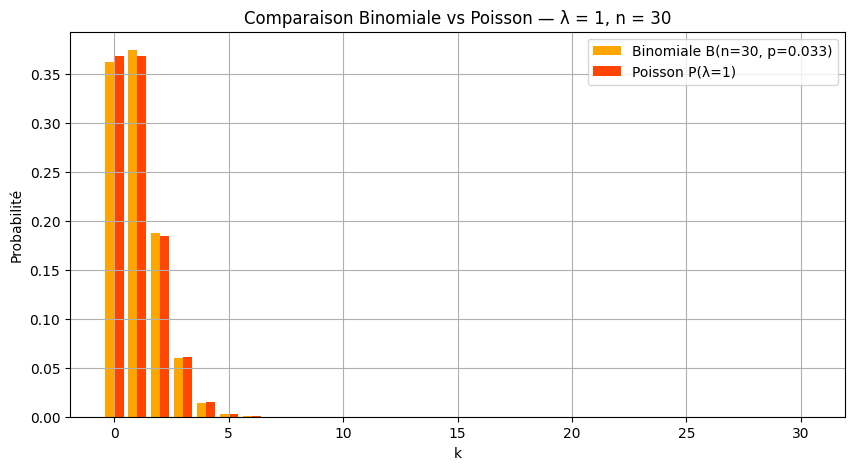

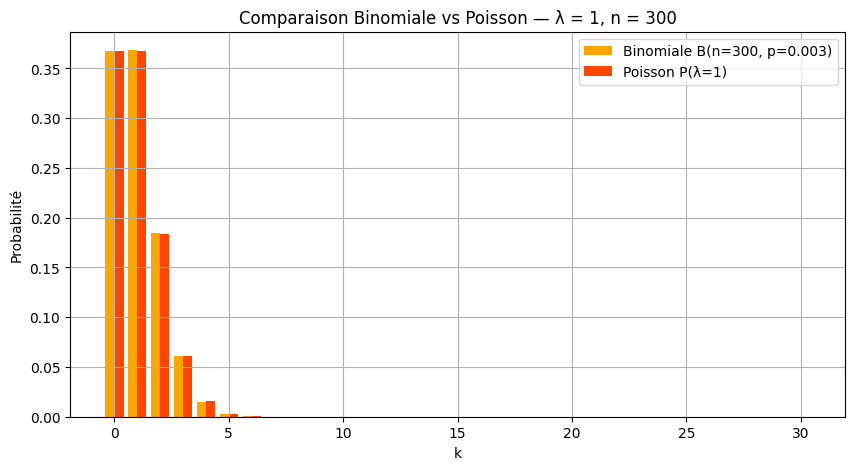

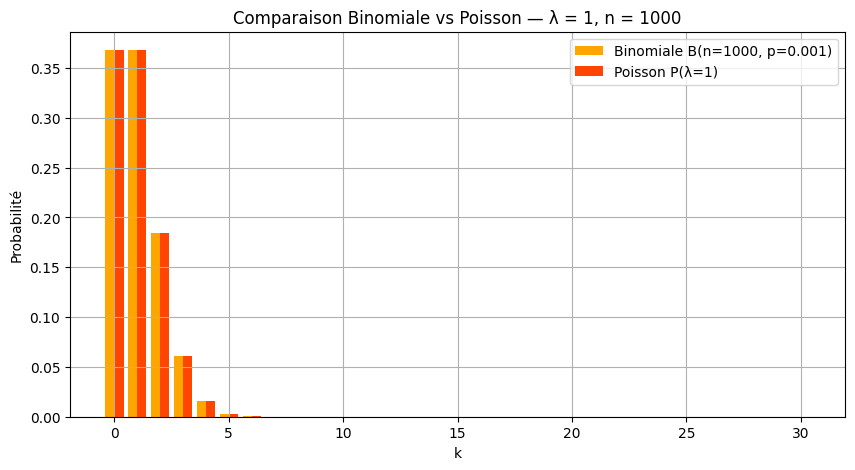

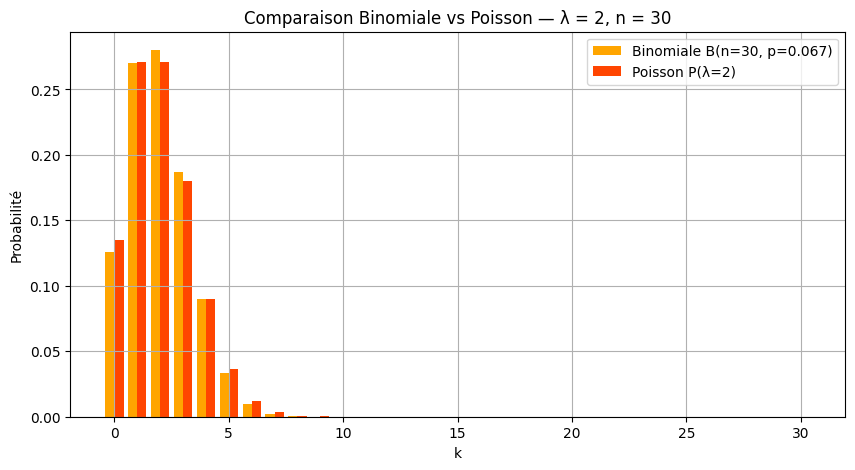

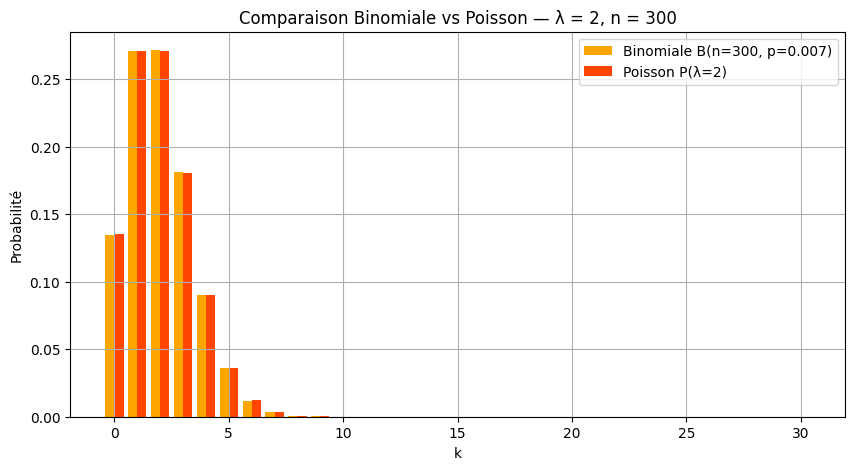

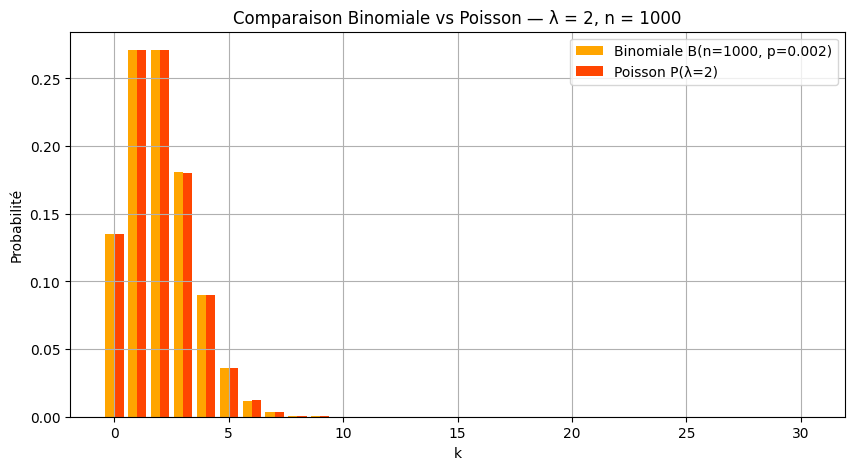

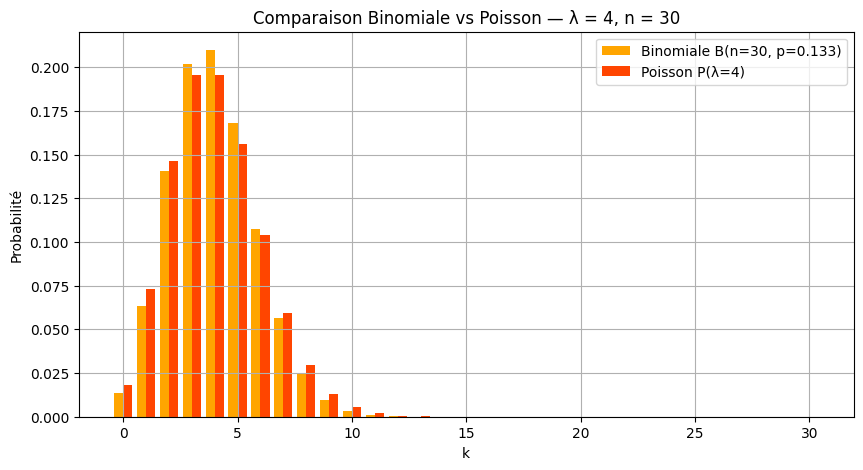

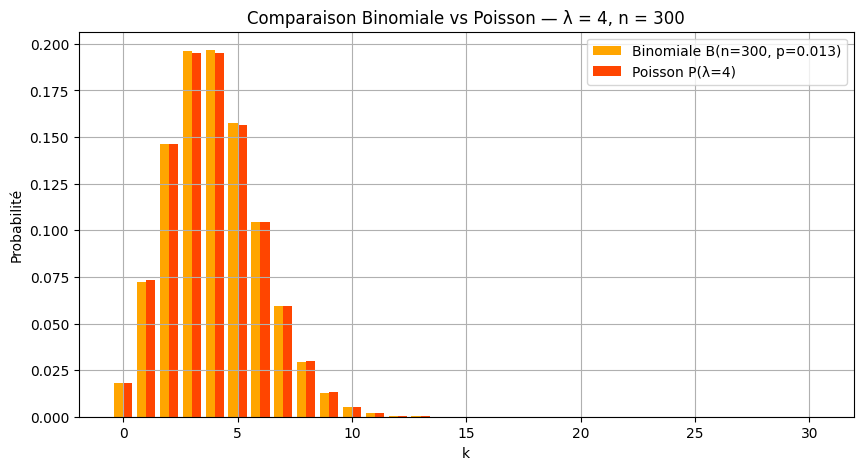

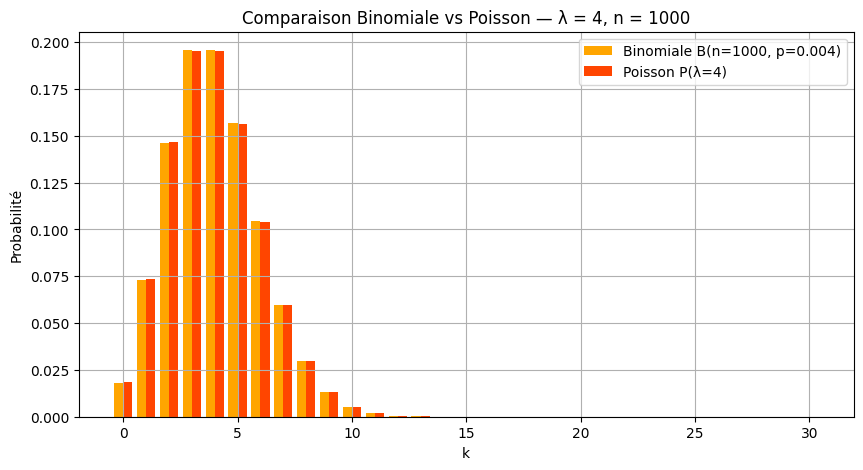

In [3]:
# c) Fonction de tracé comparatif
def plot_distributions(n, lam, k_max=30):
    x = np.arange(0, k_max + 1)
    b_vals = B(n, lam)[:k_max + 1]
    p_vals = P_kmax(k_max, lam)

    plt.figure(figsize=(10, 5))
    plt.bar(x - 0.2, b_vals, width=0.4, label=f'Binomiale B(n={n}, p={lam/n:.3f})', color='orange')
    plt.bar(x + 0.2, p_vals, width=0.4, label=f'Poisson P(λ={lam})', color='orangered')
    plt.title(f'Comparaison Binomiale vs Poisson — λ = {lam}, n = {n}')
    plt.xlabel('k')
    plt.ylabel('Probabilité')
    plt.legend()
    plt.grid(True)
    plt.show()


params = [
    (1, 30), (1, 300), (1, 1000),
    (2, 30), (2, 300), (2, 1000),
    (4, 30), (4, 300), (4, 1000),
]

for lam, n in params:
    plot_distributions(n, lam, k_max=30)
    

##### **Conclusions générales sur l’approximation de la loi binomiale par la loi de Poisson** :

##### 🔹 1. **Quand $n$ augmente, l’écart diminue**

* Pour un **$\lambda$ fixé**, plus **$n$** est grand, plus les histogrammes de la **binomiale** et de la **Poisson** se **confondent**.
* Cela confirme le théorème de convergence :

  $$
  \text{Si } X_n \sim \mathcal{B}\left(n,\ \frac{\lambda}{n}\right), \quad \text{alors } X_n \xrightarrow[]{\mathcal{L}} \mathcal{P}(\lambda)
  $$

##### 🔹 2. **La qualité de l’approximation dépend de $\lambda$** aussi :

* Pour un **$n$ fixé**, l’approximation est **meilleure pour les petits $\lambda$**.
* Si $\lambda$ augmente trop (ex. $\lambda = 4$) et que $n$ reste petit, la binomiale est **plus dispersée** que la Poisson.


##### 🔹 3. **Règle empirique** :

On peut retenir la **règle classique** :

> ✅ La loi de Poisson est une **bonne approximation** de la loi binomiale $\mathcal{B}(n, p)$
> quand $n$ est **grand**, $p$ est **petit**, et $\lambda = np$ est **modéré** (typiquement $\lambda < 5$).


### Exercice 2

Supposons avoir importé la bibliothèque `numpy.random` avec le raccourci `rd`.
On admet que la fonction `rd.random()` simule une variable uniforme sur l’intervalle $[0, 1[$.

On donne la fonction :

```python
def Attend(p):
    q = 1 - p
    Y = 1
    while rd.random() < q:
        Y += 1
    return Y
```

On suppose que $p$ est un réel de l’intervalle $]0, 1[$.


a) Quelle est la probabilité que l’instruction `Attend(p)` retourne :

* le nombre **0** ?
* le nombre **1** ?
* le nombre **2** ?

b) Si $n$ est un entier positif, quelle est la probabilité que l’itération

```python
while rd.random() < q:
    Y += 1
```

se répète **plus de $n$** fois ?
Quelle est la probabilité que cette fonction **"plante"** (c’est-à-dire qu’elle se répète indéfiniment) ?


c) Quelle variable aléatoire simule l’instruction `Attend(p)` ?


#### Correction a)

Chaque itération de la boucle a :

* une **probabilité $q$** de continuer (succès de la condition)
* une **probabilité $p$** d’arrêter (échec de la condition)

C’est exactement le **modèle d'une loi géométrique**.

---

##### - $Y = 0$ : La réponse est 0.

---

##### - $Y = 1$ :

Cela veut dire que la boucle **ne se répète pas** du tout.
C’est-à-dire que la toute première condition `rd.random() < q` **échoue** dès le premier tirage.

Donc :

$$
\mathbb{P}(Y = 1) = \mathbb{P}(\text{premier tirage} \geq q) = p
$$

---

##### - $Y = 2$ :

Cela veut dire que la boucle **se répète 1 fois** puis s’arrête.

Il faut donc :

* 1er tirage : $< q$ (proba $q$)
* 2e tirage : $\geq q$ (proba $p$)

Donc :

$$
\mathbb{P}(Y = 2) = q \cdot p
$$


---

##### - $Y = 3$ :

La boucle se répète deux fois, puis s'arrête.

$$
\mathbb{P}(Y = 3) = q \cdot q \cdot p = q^2 \cdot p
$$




In [4]:
print("""Start
 ├── p        →  Y = 1       (𝑃 = p)
 └── q
     ├── p    →  Y = 2       (𝑃 = q × p)
     └── q    →  Y ≥ 3       (𝑃 = q²)""")

Start
 ├── p        →  Y = 1       (𝑃 = p)
 └── q
     ├── p    →  Y = 2       (𝑃 = q × p)
     └── q    →  Y ≥ 3       (𝑃 = q²)


#### Correction b)

Cela veut dire que les $n$ premiers tirages sont tous $< q$, donc :

$$
\mathbb{P}(Y > n) = q^{n}
$$

---

##### Et si la boucle ne s'arrête jamais ?

Ce serait :

$$
\lim_{n \to \infty} \mathbb{P}(Y > n) = \lim_{n \to \infty} q^n = 0
$$

Puisque $0 < q < 1$, alors $q^n \to 0$.

🔹 **Donc la fonction ne “plante” jamais** avec probabilité 1.
Autrement dit, **la probabilité d’un nombre infini de répétitions est nulle.**

---



#### Correction c)

* $Y$ suit une loi géométrique de paramètre p.
* $\mathbb{P}(Y = k) = q^{k - 1} \cdot p$, pour $k = 1, 2, 3, \dots$
* $\mathbb{P}(Y > n) = q^n$
* La fonction ne boucle jamais à l’infini (la probabilité d’arrêt est 1).

### Exercice 3 : Analyse d'une série statistique

Soit une variable aléatoire `X` générée dans un environnement Python.

```python
X = np.random.normal(0, 4, 100)
X = np.abs(np.floor(X))
```

a) Représenter graphiquement `X` au moyen de l’instruction suivante :

b) Obtenir l’étendue et les quartiles de `X`.

c) À l’aide de `np.cumsum` et `np.sum`, construire une variable `Y` qui donne les **sommes cumulées** des valeurs triées de `X`.
* Normaliser `Y` pour que la **dernière valeur** soit égale à 1.
* Représenter graphiquement `Y` avec plt.bar(...)
* Retrouver **l’étendue** et les **quartiles** de `X` à partir de `Y`.

Dans un contexte de mathématiques appliquées, on utilisera plutôt au lieu de X.sort() :

```python
donnees = pd.DataFrame({"X": X})
donnees = donnees.sort_values()
```



In [5]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

# Génération de X : valeurs normales centrées réduites, rendues positives et entières
X = np.random.normal(0, 4, 100)
X = np.abs(np.floor(X))


#### Correction a) 

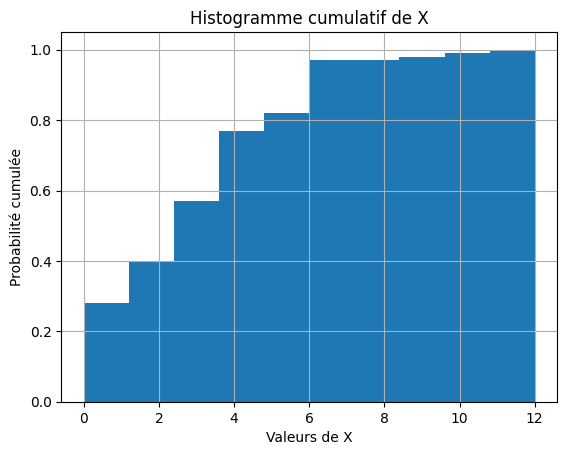

In [6]:
plt.hist(X, cumulative=True, density=True)
plt.title("Histogramme cumulatif de X")
plt.xlabel("Valeurs de X")
plt.ylabel("Probabilité cumulée")
plt.grid(True)
plt.show()


#### Correction b) 

In [7]:
etendue = np.ptp(X)  # plage (max - min) ou np.max(X) - np.min(X)
quartiles = np.percentile(X, [25, 50, 75])
print("Étendue :", etendue)
print("Quartiles (q1, q2, q3) :", quartiles)

# OU

donnees = pd.DataFrame({"X": X})
stats = donnees.describe()
q3 = stats.loc["75%", "X"]
q2 = stats.loc["50%", "X"]
q1 = stats.loc["25%", "X"]
inter = q3 - q1
print("Étendue :", np.max(X) - np.min(X))
print("Quartiles (q1, q2, q3) :", (q1, q2, q3))

Étendue : 12.0
Quartiles (q1, q2, q3) : [1. 3. 4.]
Étendue : 12.0
Quartiles (q1, q2, q3) : (1.0, 3.0, 4.0)


#### Correction c) 

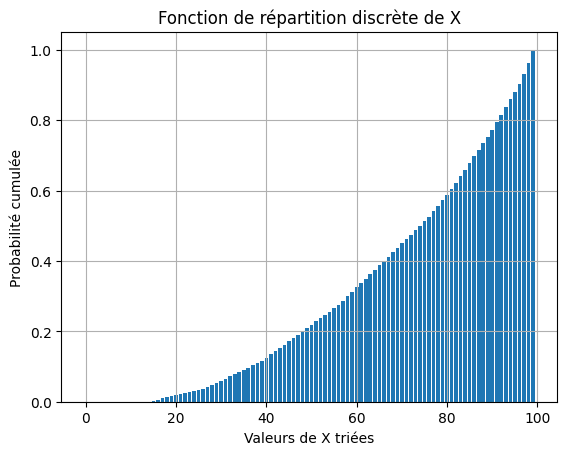

q1 : 3.0
q2 : 4.0
q3 : 6.0


In [8]:
# donnees = pd.DataFrame({"X": X})  # ou seulement X.sort()
# donnees = donnees.sort_values("X")

X.sort()
Y = np.cumsum(X) / np.sum(X)

# Représentation graphique
plt.bar(range(len(Y)), Y)
plt.title("Fonction de répartition discrète de X")
plt.xlabel("Valeurs de X triées")
plt.ylabel("Probabilité cumulée")
plt.grid(True)
plt.show()

# Retrouver étendue et quartiles à partir de Y
# On cherche l’indice où la somme cumulée atteint 25 %, 50 %, 75 %. (pseudo-quartiles)

i_q1 = np.argmax(Y >= 0.25)
i_q2 = np.argmax(Y >= 0.50)
i_q3 = np.argmax(Y >= 0.75)

print("q1 :", X[i_q1])
print("q2 :", X[i_q2])
print("q3 :", X[i_q3])

### Exercice 4 

```python
n = 1000
X = np.floor(rd.normal(10, 2, n))
```

**a)**
Obtenir la matrice
$M = [m_i, e_i]$
des **modalités-effectifs** dans l’ordre croissant des $e_i$,
puis la matrice
$M_1 = [m_i, f_i]$
où $f_i = \frac{e_i}{n}$ est la **fréquence** de la modalité $m_i$.

**b)**
Représenter graphiquement les $e_i$ (et/ou $f_i$) en fonction de $m_i$ au moyen de la méthode `plot.bar()`.

> *On constate qu’en général, une des modalités apparaît plus souvent que les autres, on l’appelle le **mode**.*

**c)**
Représenter les $e_i$ (et/ou les $f_i$) **cumulés croissants** en fonction de $m_i$
au moyen de la méthode `plot.bar()`.

> *(Remarque : ce sont les $e_i$ qui sont ordonnés croissants — pas les $m_i$ — puis cumulés.)*

**d)**
Représenter les $e_i$ (et/ou les $f_i$) **cumulés** en fonction de $m_i$ **croissants** au moyen de la méthode `plot.bar()`.


In [9]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

# Génération des données
n = 1000
X = np.floor(np.random.normal(10, 2, n))

#### Correction a)

In [10]:
valeurs, effectifs = np.unique(X, return_counts=True)
frequences = effectifs / n

df = pd.DataFrame({'mi': valeurs, 'ei': effectifs, 'fi': frequences})
df_sorted_by_ei = df.sort_values(by='ei')  # tri selon effectif croissant
df_sorted_by_ei

,mi,ei,fi
0,2.0,1,0.001
1,3.0,2,0.002
2,4.0,5,0.005
13,15.0,5,0.005
3,5.0,14,0.014
12,14.0,20,0.020
11,13.0,45,0.045
4,6.0,46,0.046
5,7.0,87,0.087
10,12.0,96,0.096


#### Correction b)

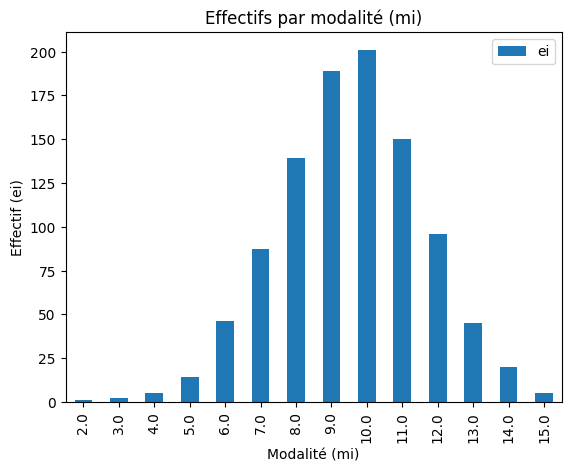

In [11]:
df.plot.bar(x='mi', y='ei', title="Effectifs par modalité (mi)")
plt.xlabel("Modalité (mi)")
plt.ylabel("Effectif (ei)")
plt.show()



#### Correction c)

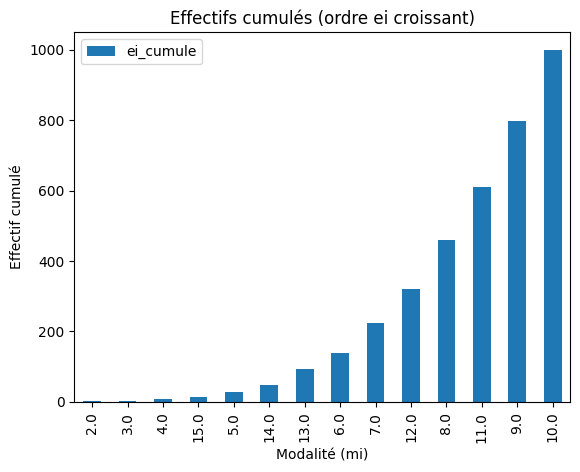

In [12]:
df_sorted_by_ei['ei_cumule'] = df_sorted_by_ei['ei'].cumsum()
df_sorted_by_ei.plot.bar(x='mi', y='ei_cumule', title="Effectifs cumulés (ordre ei croissant)")
plt.xlabel("Modalité (mi)")
plt.ylabel("Effectif cumulé")
plt.show()


#### Correction d)

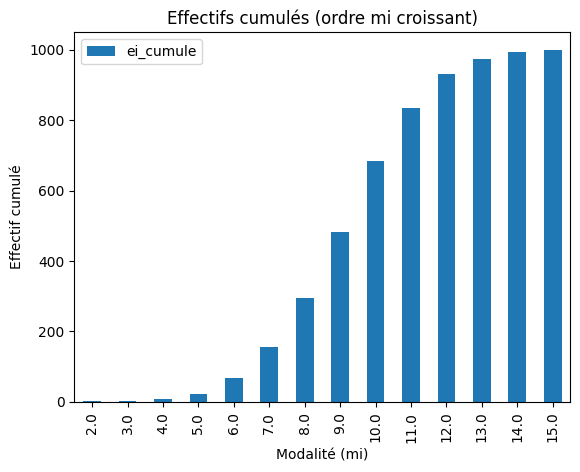

In [13]:
df_sorted_by_mi = df.sort_values(by='mi')
df_sorted_by_mi['ei_cumule'] = df_sorted_by_mi['ei'].cumsum()
df_sorted_by_mi.plot.bar(x='mi', y='ei_cumule', title="Effectifs cumulés (ordre mi croissant)")
plt.xlabel("Modalité (mi)")
plt.ylabel("Effectif cumulé")
plt.show()

### Exercice 5

a) À l’aide de `X = rd.binomial(...)`, simuler **40 séries de 6 lancers** d’une pièce équilibrée.
Affecter à `X[k]` le nombre de piles obtenus dans la k-ième série.
Afficher l’**histogramme** du vecteur `X`, avec l’option `density=True`.

**b)** Définir une fonction `binomiale(p, n, k)` qui retourne la **valeur théorique** de la loi binomiale :

* $p$ : probabilité de succès
* $n$ : nombre d’essais
* $k$ : nombre de succès

> On pourra utiliser `np.prod` et `np.arange` pour calculer les **factorielles**.

c) Superposer les résultats de la fonction `binomiale`, avec les paramètres $(6, \frac{1}{2})$, à l’histogramme précédent.

> Vérifier que ce graphique **se superpose bien** à celui généré avec `density=True`.



In [14]:
import numpy as np
import matplotlib.pyplot as plt

#### Correction a)

(array([0.   , 0.1  , 0.15 , 0.5  , 0.125, 0.125, 0.   ]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5]),
 <BarContainer object of 7 artists>)

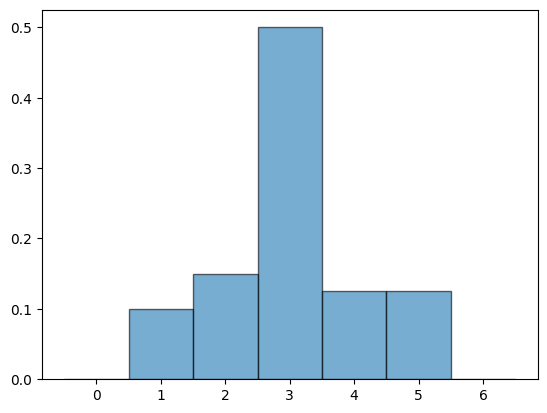

In [15]:
n = 6
p = 0.5
taille = 40
X = np.random.binomial(n, p, taille)

# Histogramme avec density=True
plt.hist(X, bins=np.arange(n+2)-0.5, density=True, edgecolor='black', alpha=0.6, label="Histogramme (expérimental)")

#### Correction b)

In [16]:
def binomiale(p, n, k):
    # Calcul de n! / (k!(n-k)!)
    fact_n = np.prod(np.arange(1, n+1))
    fact_k = np.prod(np.arange(1, k+1)) if k > 0 else 1
    fact_nk = np.prod(np.arange(1, n-k+1)) if (n-k) > 0 else 1
    coeff_binom = fact_n / (fact_k * fact_nk)
    return coeff_binom * (p**k) * ((1 - p)**(n - k))


#### Correction c)

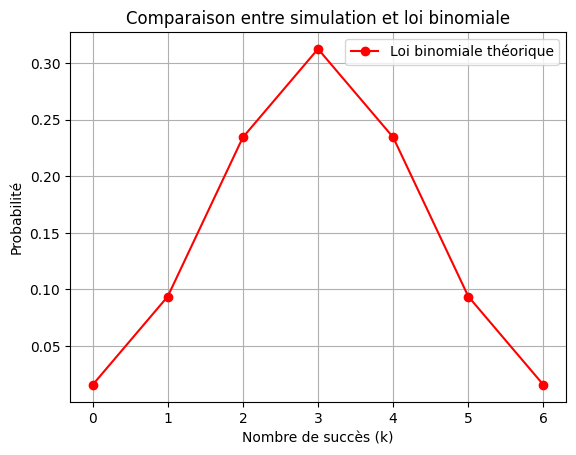

In [17]:
# c) Superposition de la loi binomiale théorique
k_vals = np.arange(0, n+1)
theorique = [binomiale(p, n, k) for k in k_vals]

plt.plot(k_vals, theorique, 'ro-', label="Loi binomiale théorique")
plt.xlabel("Nombre de succès (k)")
plt.ylabel("Probabilité")
plt.title("Comparaison entre simulation et loi binomiale")
plt.legend()
plt.grid(True)
plt.show()


### Exercice 6

* Écrire une suite d’instructions qui affecte à un vecteur ligne
  $X = [x_1, x_2, \dots, x_{1000}]$
  une suite de **1000 entiers** uniformément répartis entre **1 et 10**
  (chaque $x_i$ est la réalisation d’une variable uniforme sur $[1, 10]$).

* Écrire deux instructions qui **calculent et affichent** :

  * la **moyenne** $\bar{x}$
  * l’**écart-type empirique** $\sigma_{n-1}(X)$


In [18]:
import numpy as np

# Génération d'un vecteur de 1000 entiers entre 1 et 10 inclus
X = np.random.randint(1, 11, 1000)

# Calcul et affichage de la moyenne
print("Moyenne de X :", np.mean(X))

# Calcul et affichage de l'écart-type empirique (ddof=1 pour n-1)
print("Écart-type empirique de X :", np.std(X, ddof=1))

Moyenne de X : 5.623
Écart-type empirique de X : 2.874566773295436


### Exercice 7

On considère :

* Une variable aléatoire $X$ suivant une loi de **Poisson de paramètre 2**.
* Une variable aléatoire $Y$, dont la loi conditionnelle sachant que $X = k$ est une loi de **Poisson de paramètre $k$**.


1. **Simulations :**
   Écrire une suite de deux instructions qui effectue **1000 réalisations indépendantes** du couple $(X, Y)$ et conserve les résultats dans deux vecteurs `X` et `Y` de taille $1 \times 1000$.

2. **Exploration des valeurs :**
   Trouver :

   * le **maximum** $\ell$ de `X`,
   * le **maximum** $m$ de `Y`,
   * créer un vecteur `x = np.arange(0, ℓ+1)` contenant toutes les valeurs prises par `X`,
   * faire de même pour `Y`.

3. **Table de contingence :**
   Construire la **table de contingence** du couple $(X, Y)$, c’est-à-dire une **matrice $F$** contenant les **fréquences** $p_{i,j}$ des couples observés.

4. **Fréquences marginales :**
   Trouver les **fréquences marginales** de `X` et de `Y`.

5. **Régression linéaire et corrélation :**
   Trouver :

   * la **droite de régression de `Y` en `X`**,
   * le **coefficient de corrélation** entre `X` et `Y`.

   Pour cela, il faudra calculer :

   * $\bar{X}, \bar{Y}$
   * $\mathbb{V}(X), \mathbb{V}(Y)$
   * $\operatorname{cov}(X, Y)$

   Deux méthodes possibles :

   * à partir des **données brutes** (vecteurs),
   * à partir de la **table de contingence** et des **lois marginales**.


⚠️ Attention :

* `np.mean` ne prend pas de paramètre `weights`.

  * Pour faire une moyenne pondérée, on doit passer par `np.average(...)`.
* `np.var` non plus ne prend pas de `weights`.

  * Il faut donc programmer une fonction manuelle :

    ```python
    def variance(values, weights):
        ...
    ```



#### Correction 1)

In [19]:
import numpy as np
import pandas as pd

# Simulation
n = 1000
X = np.random.poisson(2, n)
Y = np.array([np.random.poisson(k) for k in X])

#### Correction 2)

In [20]:
l = np.max(X)  # ℓ
m = np.max(Y)  # m

x_vals = np.arange(0, l + 1)
y_vals = np.arange(0, m + 1)

#### Correction 3)

In [21]:
# Création d’un DataFrame pour construire la table
df = pd.DataFrame({"X": X, "Y": Y})

# Table de contingence brute (effectifs)
contingency_table = pd.crosstab(df["X"], df["Y"])

#Ou
# contingency_table = np.zeros((l+1,m+1))
# for k in range(n):
#     contingency_table[X[k],Y[k]] += 1

# Conversion en tableau de fréquences (p_ij)
F = contingency_table / n

#### Correction 4)

In [22]:
# Fréquences marginales de X (somme sur les colonnes)
p_X = F.sum(axis=1)

# Fréquences marginales de Y (somme sur les lignes)
p_Y = F.sum(axis=0)

#### Correction 5)

In [23]:
# # Définir la fonction de variance pondérée
# def variance(values, weights):
#     mean = np.average(values, weights=weights)
#     return np.average((values - mean) ** 2, weights=weights)

# # Moyennes
# mean_X = np.average(p_X.index, weights=p_X.values)
# mean_Y = np.average(p_Y.index, weights=p_Y.values)

# # Variances
# var_X = variance(p_X.index.to_numpy(), p_X.values)
# var_Y = variance(p_Y.index.to_numpy(), p_Y.values)

# Moyennes
mean_X = np.sum(p_X.index * p_X.values)
mean_Y = np.sum(p_Y.index * p_Y.values)

# Variances
var_X = np.sum((p_X.index - mean_X) ** 2 * p_X.values)
var_Y = np.sum((p_Y.index - mean_Y) ** 2 * p_Y.values)

# Covariance
cov_XY = 0
for i in F.index:
    for j in F.columns:
        cov_XY += (i - mean_X) * (j - mean_Y) * F.loc[i, j]
        
#OU
cov_XY = np.cov(X,Y,ddof=0)[0,1]


# Coefficient de régression de Y en X : a = cov(X, Y) / var(X)
a = cov_XY / var_X
b = mean_Y - a * mean_X

# Coefficient de corrélation linéaire
r = cov_XY / (np.sqrt(var_X) * np.sqrt(var_Y))

print(f"Régression Y = {a:.3f} * X + {b:.3f}")
print(f"Corrélation r = {r:.3f}")

Régression Y = 1.040 * X + -0.053
Corrélation r = 0.749


### Exercice 7 : Simulation de la loi normale centrée réduite

Après importation, la fonction `rd.normal(0,1)` permet de simuler des valeurs suivant la loi normale centrée réduite.

On peut aussi approximer cette loi avec d’autres méthodes :

---

#### 🔹 Méthode 1 : **Approximation par la loi des grands nombres**

En prenant un échantillon $(U_1, ..., U_n)$ de la loi uniforme sur $[0, 1]$, on définit :

$$
X_n = \sqrt{\frac{12}{n}} \left( \sum_{k=1}^n U_k - \frac{n}{2} \right)
$$

→ Pour $n = 12$, $X_{12}$ est une bonne approximation de la loi $\mathcal{N}(0,1)$.

---

#### 🔹 Méthode 2 : **Méthode de Box-Muller**

À partir de deux variables aléatoires indépendantes $U$ et $V$ uniformes sur $[0, 1]$, on définit :

$$
T = \sqrt{-2\ln(U)} \cdot \cos(2\pi V)
$$

→ Cette variable suit aussi $\mathcal{N}(0,1)$.

---

1. **Écrire une commande** qui donne $N$ réalisations de la loi $\mathcal{N}(0,1)$ en utilisant `rd.normal`.

2. **Écrire une fonction `loiU(N)`** qui retourne $N$ réalisations de $X_{12}$ (avec $n = 12$), par la formule d’approximation.

3. **Écrire une fonction `BoxMuller(N)`** qui retourne $N$ réalisations de $T$, avec la méthode de Box-Muller.

4. **Comparer les trois méthodes** en traçant les **histogrammes côte à côte** pour $N = 10^5$.



In [24]:
import numpy as np
import matplotlib.pyplot as plt

#### Correction 1) 

In [25]:
def normale_numpy(N):
    return np.random.normal(0, 1, N)

#### Correction 2) 

In [26]:
def loiU(N):
    n = 12
    U = np.random.uniform(0, 1, size=(N, n))
    Xn = np.sqrt(12 / n) * (np.sum(U, axis=1) - n / 2)
    return Xn

#### Correction 3) 

In [27]:
def BoxMuller(N):
    U = np.random.uniform(0, 1, N)
    V = np.random.uniform(0, 1, N)
    T = np.sqrt(-2 * np.log(U)) * np.cos(2 * np.pi * V)
    return T

#### Correction 4) 

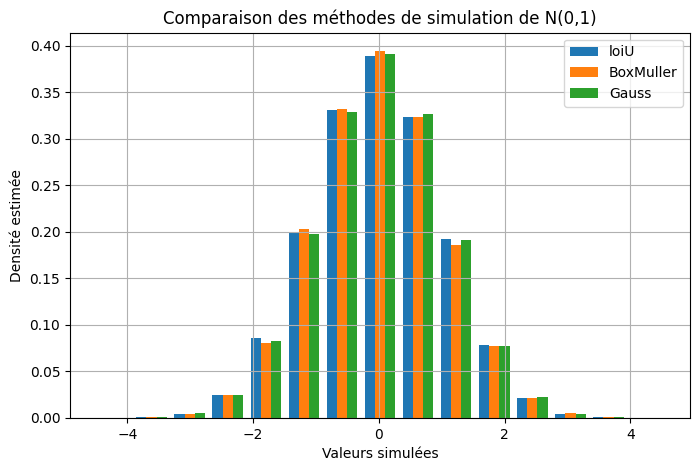

In [28]:
import numpy as np
import matplotlib.pyplot as plt

N = 10**5

data_normal = normale_numpy(N)
data_loiU = loiU(N)
data_box = BoxMuller(N)

plt.figure(figsize=(8, 5))

# Superposition des trois histogrammes
plt.hist([loiU(N),BoxMuller(N),normale_numpy(N)],
bins=15,density=True,
label=["loiU","BoxMuller","Gauss"])

# Courbe de densité théorique (optionnel)
# x = np.linspace(-5, 5, 500)
# f_theorique = (1/np.sqrt(2*np.pi)) * np.exp(-x**2 / 2)
# plt.plot(x, f_theorique, 'k--', label='Densité normale théorique')

# Personnalisation
plt.title("Comparaison des méthodes de simulation de N(0,1)")
plt.xlabel("Valeurs simulées")
plt.ylabel("Densité estimée")
plt.legend()
plt.grid(True)
plt.show()


### Exercice 8 : Simulation de la loi de Pareto

La **loi de Pareto** de paramètres $x_{\min} \in \mathbb{R}^+$ et $k \in \mathbb{N}^*$ est une loi continue dont la densité est donnée par :

$$
f(x) = 
\begin{cases}
0 & \text{si } x < x_{\min} \\
\dfrac{k x_{\min}^k}{x^{k+1}} & \text{si } x \ge x_{\min}
\end{cases}
$$

---

On souhaite observer que cette loi peut être simulée à partir de la loi uniforme continue sur $[0, 1]$, selon la méthode suivante :

> Soit $(X_1, ..., X_k)$ un échantillon de la loi uniforme sur $[0, 1]$,
> alors la variable :

$$
Y = \frac{x_{\min}}{\max(X_1, ..., X_k)}
$$

suit approximativement la loi de Pareto de paramètres $x_{\min}$ et $k$.

> ⚠️ On remarque que cette variable est **presque sûrement définie**, car :
> $\mathbb{P}(\max(X_1, ..., X_k) = 0) = 0$

---

1. **Simuler la variable aléatoire $Y$**

   * Prendre $k = 5$, $x_{\min} = 2$

2. **Écrire une fonction Python** de paramètres d’entrée $(x_{\min}, k, N)$

   * Cette fonction doit générer un **échantillon $E$** de taille $N$, suivant la même loi que $Y$.

3. Supposons maintenant :
   $k = 5$, $x_{\min} = 2$, $N = 10\,000$
   On considère l’échantillon $E$ simulé comme ci-dessus.

   a) **Déterminer une borne $\alpha$** telle que l’intervalle $[0, \alpha]$ contienne **99 % des valeurs** de $E$

   b) **Tracer un histogramme** :

   * Répartir les valeurs de $E$ en **100 classes**,
   * Sur le **même graphique**, afficher la **courbe de densité théorique** $f(x)$


#### Correction 1)

In [29]:
import numpy as np

# Paramètres
k = 5
xmin = 2

# Génération d’un vecteur de k valeurs uniformes
U = np.random.uniform(0, 1, k)

# Calcul de Y
Y = xmin / np.max(U)
print("Une réalisation de Y :", Y)

Une réalisation de Y : 2.636256175393372


#### Correction 2)

In [30]:
def pareto_simulation(xmin, k, N):
    # Générer une matrice N x k de valeurs uniformes
    U = np.random.uniform(0, 1, size=(N, k))
    max_U = np.max(U, axis=1)
    return xmin / max_U

#### Correction 3) a)

In [31]:
import matplotlib.pyplot as plt

# Paramètres
k = 5
xmin = 2
N = 10_000

# Génération de l’échantillon
E = pareto_simulation(xmin, k, N)

# (a) Trouver alpha tel que P(E ≤ alpha) ≈ 0.99
alpha = np.quantile(E, 0.99)
print("Valeur de alpha (99% des E ≤ alpha) :", alpha)

Valeur de alpha (99% des E ≤ alpha) : 5.084517405161628


#### Correction 3) b)

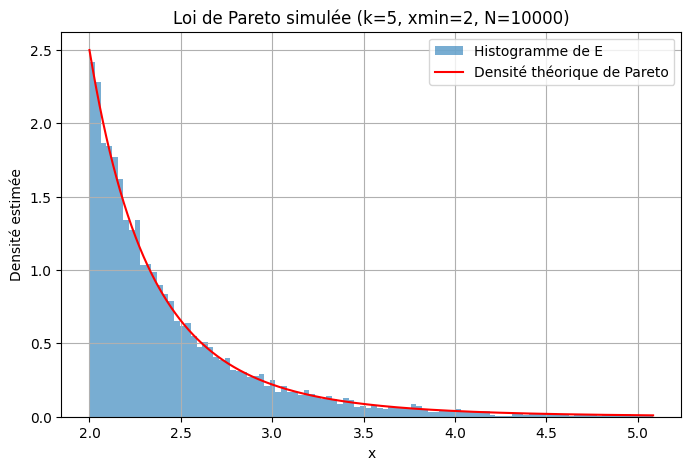

In [32]:
def pareto_density(x, xmin, k):
    f = np.zeros_like(x)
    mask = x >= xmin
    f[mask] = (k * xmin**k) / (x[mask]**(k + 1))
    return f

# Tracé
x_vals = np.linspace(xmin, alpha, 1000)
f_vals = pareto_density(x_vals, xmin, k)

plt.figure(figsize=(8, 5))
plt.hist(E, bins=100, range=(xmin, alpha), density=True, alpha=0.6, label='Histogramme de E')
plt.plot(x_vals, f_vals, 'r-', label='Densité théorique de Pareto')
plt.title(f"Loi de Pareto simulée (k={k}, xmin={xmin}, N={N})")
plt.xlabel("x")
plt.ylabel("Densité estimée")
plt.legend()
plt.grid(True)
plt.show()

### Exercice 9 : Simulation de pannes et loi de Poisson

On observe à partir d’un instant 0 un système qui **tombe en panne de façon aléatoire**.
Chaque panne est suivie d’une **réparation immédiate**.

On note :

* $N_t$ : le **nombre de pannes** survenues jusqu’à l’instant $t$,
* $S_0 = 0$, $S_1$, $S_2$, … : les **durées de fonctionnement** entre deux pannes successives.

On suppose que les $S_n$ sont **indépendantes**, de loi **exponentielle de paramètre $\lambda > 0$**.

---

On montre alors que pour tout $t \in \mathbb{R}^{+*}$ :

$$
N_t = \max\left\{ n \in \mathbb{N} \ \bigg| \ \sum_{i=0}^{n} S_i \le t \right\}
$$

---

**Simulation directe de $N_t$**

1. Écrire une fonction **`simulen(t, λ)`** qui simule une valeur de $N_t$.

2. Construire, à l’aide de cette fonction, un échantillon de **taille 10 000** de $N_1$ (avec $t = 1$, $λ = 2$).

3. Estimer la **loi de $N_1$** avec un histogramme (`plt.hist`).


**Estimation par moyenne – Loi de Poisson**

> On démontre que $N_t$ suit une **loi de Poisson** de paramètre $λt$.

4. Écrire une fonction **`parametreN(λ, t, n)`** qui :

   * génère un échantillon de taille $n$ de $N_t$,
   * retourne une **estimation du paramètre** $λt$ à partir de la moyenne des valeurs simulées.

**Étude de la dépendance en $t$**

> On note $φ_λ(t)$ le **paramètre de la loi de $N_t$**.

5. Représenter sur un même graphique les courbes $φ_1(t), φ_2(t), ..., φ_5(t)$
   pour $t \in [0, 1]$, avec $n = 1000$ simulations pour chaque point.

6. **Que remarque-t-on ?**


#### Correction 1)

In [33]:
def simulen(t, lambd):
    S = 0
    n = 0
    while S <= t:
        S += np.random.exponential(1 / lambd)
        n += 1
    return n - 1  # on dépasse t à la dernière itération

#### Correction 2)

In [34]:
N = 10_000
lambd = 2
t = 1

echantillon = [simulen(t, lambd) for _ in range(N)]

#### Correction 3)

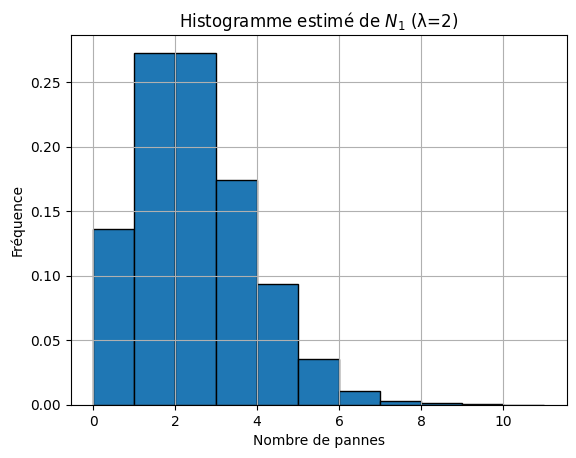

In [35]:
import matplotlib.pyplot as plt

plt.hist(echantillon, bins=range(min(echantillon), max(echantillon)+2), edgecolor='black', density=True)
plt.title("Histogramme estimé de $N_1$ (λ=2)")
plt.xlabel("Nombre de pannes")
plt.ylabel("Fréquence")
plt.grid(True)
plt.show()

#### Correction 4)

In [36]:
def parametreN(lambd, t, n):
    echantillon = [simulen(t, lambd) for _ in range(n)]
    return np.mean(echantillon)

estimation = parametreN(2, 1, 10_000)
print("Estimation du paramètre λt =", estimation)

Estimation du paramètre λt = 2.0063


#### Correction 5)

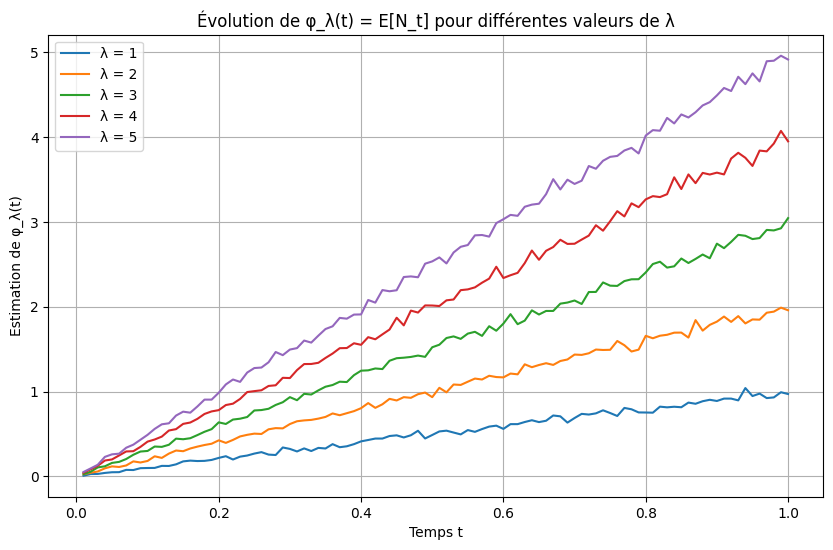

In [37]:
t_values = np.linspace(0.01, 1, 100)  # éviter t = 0 pour éviter boucle infinie
n = 1000  # taille de l’échantillon pour chaque t
lambdas = [1, 2, 3, 4, 5]
phi_values = {lambd: [] for lambd in lambdas}

for lambd in lambdas:
    for t in t_values:
        phi = parametreN(lambd, t, n)
        phi_values[lambd].append(phi)

# Tracé des courbes
plt.figure(figsize=(10, 6))
for lambd in lambdas:
    plt.plot(t_values, phi_values[lambd], label=f"λ = {lambd}")
plt.xlabel("Temps t")
plt.ylabel("Estimation de φ_λ(t)")
plt.title("Évolution de φ_λ(t) = E[N_t] pour différentes valeurs de λ")
plt.legend()
plt.grid(True)
plt.show()

#### Correction 6)

* Pour chaque λ, la fonction $φ_λ(t)$ est **presque linéaire**, ce qui confirme que :

  $$
  \mathbb{E}[N_t] \approx λt
  $$

* Cela illustre que $N_t \sim \text{Poisson}(λt)$, c’est-à-dire :

  * l'espérance et la variance de $N_t$ sont toutes deux égales à $λt$,
  * plus λ est grand, plus les courbes montent rapidement.



### Exercice 10 : Simulation de tirages sans remise dans une urne

Une urne contient $n$ boules numérotées de 1 à $n$.
On tire les boules **sans remise**, une à une, **jusqu'à obtenir la boule numéro 1**.
On note $X$ le **nombre de boules restant dans l’urne** au moment où la boule 1 est tirée.

---

1. Écrire une fonction `simule_X(n)`

→ Elle doit **simuler la variable $X$**, c’est-à-dire le **nombre de boules restantes** au moment où la boule n°1 est tirée.

> 🔸 Aide :

* Considérer un vecteur contenant les nombres $1, 2, ..., n$ dans l’ordre.
* Le mélanger avec une fonction de permutation (comme `np.random.shuffle`).
* Chercher la **position de la boule 1** dans cette permutation.
* Le nombre de boules restantes est $n - \text{indice de 1} - 1$.

---

2. Répéter l'expérience un grand nombre de fois avec $n = 10$

* Simuler de nombreuses réalisations de $X$ (ex : 10 000).
* Tracer un **histogramme** de la variable $X$ avec `plt.hist(...)`.
* **Conjecturer la loi de $X$** (forme, régularité, probabilité constante ?).

---

3. Écrire une fonction `proba(echantillon, n, alpha)`

Cette fonction prend en entrée :

* un **échantillon** de valeurs simulées de $X$,
* le nombre de boules $n$,
* un **niveau de risque** $\alpha \in (0, 1)$.

Et retourne :

* un vecteur `P` d’estimations de $\mathbb{P}(X = k)$ pour $k = 0, ..., n-1$,
* deux vecteurs `U` et `V` correspondant aux **bornes de l’intervalle de confiance** asymptotique au **niveau $1 - \alpha$** pour chaque $k$.

> ✳️ Format attendu :

```python
def proba(echantillon, n, alpha):
    ...
    return [P, U, V]
```

---

Vérification de la conjecture

* Utiliser les résultats de `proba(...)` avec :

  * $n = 10$, $N = 10\,000$, $\alpha = 5\%$
* **Comparer les probabilités estimées avec l’allure observée** à la question 2.



#### Correction 1)

In [38]:
import numpy as np

def simule_X(n):
    boules = np.arange(1, n + 1)
    np.random.shuffle(boules)
    index_1 = np.where(boules == 1)[0][0]
    return n - index_1 - 1

#### Correction 2)

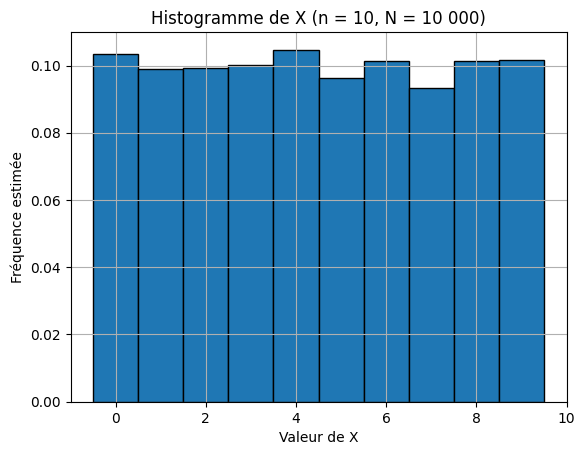

In [39]:
import matplotlib.pyplot as plt

n = 10
N = 10_000

echantillon = [simule_X(n) for _ in range(N)]

plt.hist(echantillon, bins=np.arange(n+1)-0.5, density=True, edgecolor='black')
plt.title("Histogramme de X (n = 10, N = 10 000)")
plt.xlabel("Valeur de X")
plt.ylabel("Fréquence estimée")
plt.grid(True)
plt.show()

#### Correction 3)

In [40]:
from scipy.stats import norm

def proba(echantillon, n, alpha):
    counts = np.zeros(n)
    
    for val in echantillon:
        if 0 <= val < n:
            counts[val] += 1
    
    P = counts / len(echantillon)
    
    # Intervalle de confiance asymptotique (normal) :
    z = norm.ppf(1 - alpha/2)
    se = np.sqrt(P * (1 - P) / len(echantillon))  # standard error
    
    U = P - z * se
    V = P + z * se
    
    # Ajustement des bornes pour rester dans [0,1]
    U = np.clip(U, 0, 1)
    V = np.clip(V, 0, 1)
    
    return P, U, V

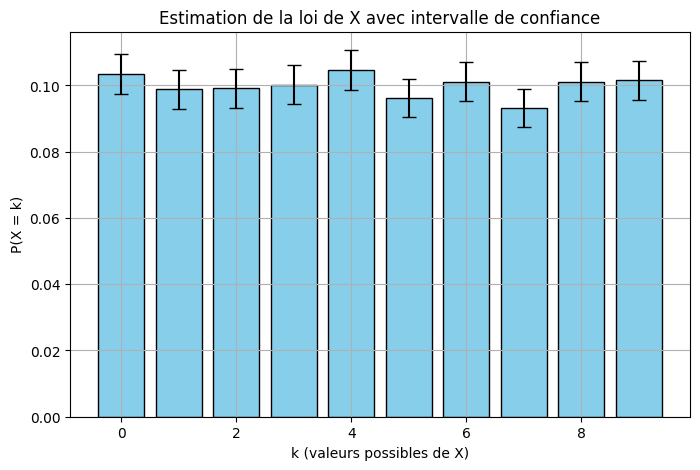

In [41]:
alpha = 0.05
P, U, V = proba(echantillon, n, alpha)

# Affichage des résultats
k_vals = np.arange(n)

plt.figure(figsize=(8,5))
plt.bar(k_vals, P, yerr=[P - U, V - P], capsize=5, color='skyblue', edgecolor='black')
plt.title("Estimation de la loi de X avec intervalle de confiance")
plt.xlabel("k (valeurs possibles de X)")
plt.ylabel("P(X = k)")
plt.grid(True)
plt.show()

**Interprétation :**

* La loi estimée de $X$ est **quasi-uniforme** sur $[0, n-1]$,
* Les **intervalles de confiance** sont **étroits** pour $N = 10\,000$,
* Cela **confirme la conjecture** : $X \sim \mathcal{U}([0, n-1])$.

### Exercice 11 : Marche aléatoire en une dimension

Un promeneur ivre se déplace sur une **droite graduée** et orientée.
Il part à un instant 0 du point $O$.
À chaque pas, il se déplace d’**une unité à droite ou à gauche** avec la même probabilité.
On note $X_i$ la **position du promeneur après le $i$-ème pas**.

---

1. Écrire une fonction de paramètre d’entrée $n$, qui retourne le **vecteur $X$** contenant les différentes positions $X_1, \dots, X_n$.

2. Écrire une fonction prenant en entrée :

* un vecteur $X$,
* un réel $r$,

et qui retourne un booléen indiquant **si le promeneur s’est écarté strictement de plus de $r$ unités** de son point de départ à un moment quelconque du trajet.

3. Recommencer **10 000 fois** l’expérience :

Estimer la **probabilité que le promeneur s’éloigne strictement de plus de 10 unités** de son point de départ au cours des **100 premiers pas**.

4. Reprendre les questions précédentes en supposant maintenant que le promeneur se déplace dans un **plan** (2D).

À chaque pas, il peut se déplacer :

* vers le **haut**,
* vers le **bas**,
* vers la **gauche**,
* vers la **droite**,

avec la **même probabilité**.

Après $k$ déplacements, le promeneur est repéré par ses coordonnées $(x(k), y(k))$.
La **distance à l’origine** est donnée par la formule :

$$
d = \sqrt{x^2 + y^2}
$$


#### Correction 1)

In [42]:
def marche_1D(n):
    pas = np.random.choice([-1, 1], size=n)
    position = np.cumsum(pas)
    return position  # retourne X₁, X₂, ..., Xₙ

#### Correction 2)

In [43]:
def ecart_depasse(X, r):
    return np.any(np.abs(X) > r)

#### Correction 3)

In [44]:
N = 10_000
n = 100
r = 10

comptage = 0
for _ in range(N):
    X = marche_1D(n)
    if ecart_depasse(X, r):
        comptage += 1

proba = comptage / N
print(f"Probabilité de s’éloigner strictement de plus de {r} unités en {n} pas ≈ {proba:.4f}")

Probabilité de s’éloigner strictement de plus de 10 unités en 100 pas ≈ 0.5466


#### Correction 4)

In [45]:
def marche_2D(n):
    # mouvements : haut, bas, gauche, droite
    directions = {
        0: (0, 1),   # haut
        1: (0, -1),  # bas
        2: (-1, 0),  # gauche
        3: (1, 0),   # droite
    }

    choix = np.random.choice([0, 1, 2, 3], size=n)
    x, y = [0], [0]

    for c in choix:
        dx, dy = directions[c]
        x.append(x[-1] + dx)
        y.append(y[-1] + dy)

    return np.array(x[1:]), np.array(y[1:])  # sans le point initial (0,0)


def ecart_depasse_2D(x, y, r):
    distances = np.sqrt(x**2 + y**2)
    return np.any(distances > r)


comptage_2D = 0

for _ in range(N):
    x, y = marche_2D(n)
    if ecart_depasse_2D(x, y, r):
        comptage_2D += 1

proba_2D = comptage_2D / N
print(f"Probabilité 2D de dépasser {r} unités en {n} pas ≈ {proba_2D:.4f}")

# En général, la probabilité de s’éloigner d’une certaine distance est plus faible en 2D qu’en 1D pour un même nombre de pas, car les directions sont réparties sur plus d’axes.



Probabilité 2D de dépasser 10 unités en 100 pas ≈ 0.5894


### Exercice 12 : Modèle de Black-Scholes

Dans le modèle de Black-Scholes, la valeur d’une option est donnée par la formule :

$$
C_0 = e^{-rT} \mathbb{E} \left( \max\left(S_0 e^{(r - \frac{1}{2} \sigma^2)T + \sigma \sqrt{T} U} - K, 0 \right) \right)
$$

* $r = \ln(1 + R)$, avec $R$ le **taux d’intérêt sans risque**.
* $\sigma$ est la **volatilité** du sous-jacent.
* $U \sim \mathcal{N}(0, 1)$ est une **variable aléatoire normale centrée réduite**.
* $S_0$ est le **cours initial**, $K$ le **prix d’exercice**, et $T$ la **maturité**.

---

On définit les variables :

$$
S = S_0 e^{(r - \frac{1}{2} \sigma^2)T + \sigma \sqrt{T} U}, \quad C = \max(S - K, 0)
$$

On prendra :

* $S_0 = K = 100$,
* $T = \frac{1}{4}$ (un trimestre),
* $R = 2\%$.

---
1. Écrire une fonction **`echantillon(S0, K, T, σ, R)`**

→ qui retourne 10 000 valeurs de la variable aléatoire **$S$** et de **$C$**.

---
2. Tracer l’**histogramme** des valeurs de $S$ pour :

* $R = 2\%$,
* $\sigma = 0.5$ puis $\sigma = 1$.

Expliquer la différence entre ces deux instructions :

```python
plt.hist(C, bins=np.arange(0, 200, 5))
plt.hist(C, bins=np.arange(0, 1_200, 5))
```

---
3. Donner une **estimation empirique** de la valeur de l’option pour :

* $R = 2\%$,
* $\sigma$ variant de 0 à 1 par pas de 0.1.

→ Quelle est l’influence de la **volatilité $\sigma$** sur le prix de l’option ?

---
4. On donne la **formule analytique** exacte du prix de l’option :

$$
C_0 = S_0 \Phi(d_1) - K e^{-rT} \Phi(d_2)
$$

avec :

$$
d_1 = \frac{\ln(S_0 / K) + (r + \frac{1}{2} \sigma^2)T}{\sigma \sqrt{T}}, \quad d_2 = d_1 - \sigma \sqrt{T}
$$

où $\Phi$ est la **fonction de répartition de la loi normale centrée réduite**.

(a) Écrire une fonction **`valorisation_option(S0, K, T, σ, R)`** qui calcule $C_0$ analytiquement.

(b) **Comparer les résultats** de cette formule à ceux obtenus à la question 3.

#### Correction 1)

In [46]:
def echantillon(S0, K, T, sigma, R, N=10000):
    r = np.log(1 + R)
    U = np.random.normal(0, 1, N)
    S = S0 * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * U)
    C = np.maximum(S - K, 0)
    return S, C

#### Correction 2)

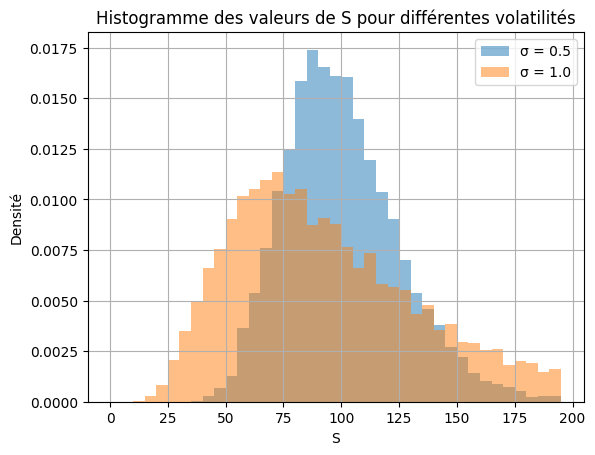

In [47]:
import matplotlib.pyplot as plt

# Paramètres
S0 = K = 100
T = 0.25
R = 0.02
N = 10000

# Cas sigma = 0.5
S1, C1 = echantillon(S0, K, T, sigma=0.5, R=R, N=N)

# Cas sigma = 1
S2, C2 = echantillon(S0, K, T, sigma=1, R=R, N=N)

plt.hist(S1, bins=np.arange(0, 200, 5), alpha=0.5, label="σ = 0.5", density=True)
plt.hist(S2, bins=np.arange(0, 200, 5), alpha=0.5, label="σ = 1.0", density=True)
plt.title("Histogramme des valeurs de S pour différentes volatilités")
plt.xlabel("S")
plt.ylabel("Densité")
plt.legend()
plt.grid(True)
plt.show()

#### Correction 3)

In [48]:
sigmas = np.arange(0, 1.1, 0.1)
prix_estimes = []

for sigma in sigmas:
    _, C = echantillon(100, 100, 0.25, sigma, 0.02)
    prix_estimes.append(np.mean(C))

#### Correction 4) a)

In [49]:
def valorisation_option(S0, K, T, sigma, R):
    r = np.log(1 + R)
    d1 = (np.log(S0 / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T)) if sigma > 0 else np.inf
    d2 = d1 - sigma * np.sqrt(T)
    return S0 * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

#### Correction 4) b)

In [50]:
prix_exacts = [valorisation_option(100, 100, 0.25, sigma, 0.02) for sigma in sigmas]

# Comparaison (texte)
resultats = list(zip(sigmas, prix_estimes, prix_exacts))
for s, est, exact in resultats:
    print(f"sigma = {s:.1f} | estimé = {est:.4f} | exact = {exact:.4f}")

sigma = 0.0 | estimé = 0.4963 | exact = 0.4938
sigma = 0.1 | estimé = 2.2331 | exact = 2.2462
sigma = 0.2 | estimé = 4.2068 | exact = 4.2297
sigma = 0.3 | estimé = 6.3902 | exact = 6.2139
sigma = 0.4 | estimé = 8.0158 | exact = 8.1952
sigma = 0.5 | estimé = 10.0966 | exact = 10.1719
sigma = 0.6 | estimé = 11.9746 | exact = 12.1426
sigma = 0.7 | estimé = 14.4272 | exact = 14.1060
sigma = 0.8 | estimé = 16.0335 | exact = 16.0609
sigma = 0.9 | estimé = 18.5008 | exact = 18.0061
sigma = 1.0 | estimé = 20.4347 | exact = 19.9404
